<a href="https://colab.research.google.com/github/cesaraugustt/Trabalho-ML/blob/main/Trabalho_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Machine Learning: Classificação de Pinguins Palmer

## 1. Contextualização do Dataset

### Introdução
O objetivo deste projeto é desenvolver um modelo de aprendizado de máquina capaz de classificar espécies de pinguins (Adelie, Chinstrap e Gentoo) com base em suas características físicas e geográficas.

O dataset utilizado é o **Palmer Archipelago (Antarctica) penguin data**, coletado pela Dr. Kristen Gorman e pela Estação Palmer (LTER). Ele é amplamente utilizado como uma alternativa moderna ao clássico dataset "Iris" para tarefas de classificação e visualização de dados.

### Descrição dos Dados
O conjunto de dados contém as seguintes variáveis (features):
- **species**: A espécie do pinguim (Target/Alvo).
- **island**: A ilha onde o pinguim foi encontrado (Biscoe, Dream ou Torgersen).
- **culmen_length_mm**: Comprimento do cúlmen (bico) em mm.
- **culmen_depth_mm**: Profundidade do cúlmen (bico) em mm.
- **flipper_length_mm**: Comprimento da nadadeira em mm.
- **body_mass_g**: Massa corporal em gramas.
- **sex**: Sexo do pinguim.

In [40]:
!pip install kagglehub[pandas-datasets] --quiet

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

In [41]:
file_path = "penguins_size.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "parulpandey/palmer-archipelago-antarctica-penguin-data",
  file_path,
)

Using Colab cache for faster access to the 'palmer-archipelago-antarctica-penguin-data' dataset.


In [42]:
print("--- Primeiras linhas ---")
display(df.head())

print("\n--- Informações Gerais ---")
df.info()

print("\n--- Nulos por Coluna ---")
print(df.isnull().sum())

print("\n--- Valores únicos ---")
print(df.nunique())

--- Primeiras linhas ---


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE



--- Informações Gerais ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB

--- Nulos por Coluna ---
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

--- Valores únicos ---
species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
se

## Preparação dos Dados

In [43]:
print(df['sex'].value_counts())

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


In [44]:
moda_sex = df['sex'].mode()[0]
df['sex'] = df['sex'].replace('.', moda_sex)
df['sex'] = df['sex'].fillna(moda_sex)

In [45]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

for col in numeric_columns:
    median = df[col].median()
    df[col] = df[col].fillna(median)

In [46]:
print(df.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


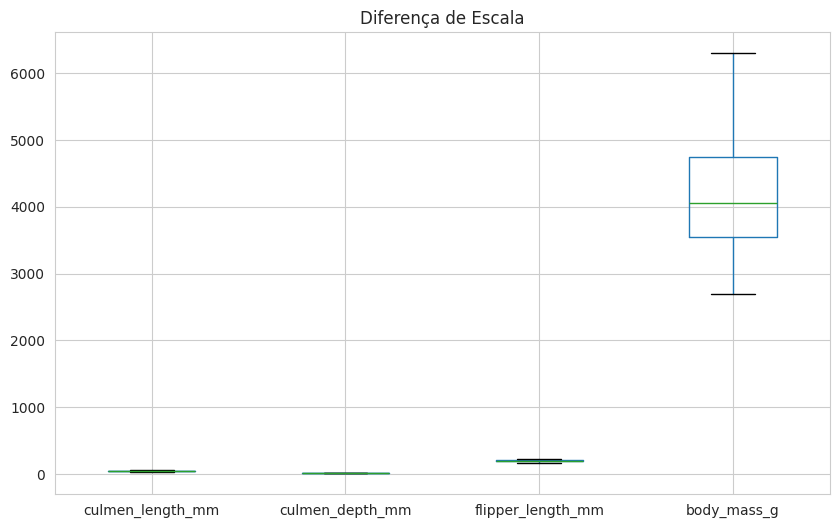

In [47]:
plt.figure(figsize=(10, 6))
numeric_columns.boxplot()
plt.title("Diferença de Escala")
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('species', axis=1)
y = df['species']

# Codificação do Target
map_species = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
y = df['species'].map(map_species)

# Codificação das Features Categóricas (Get Dummies / One-Hot Encoding)
X = pd.get_dummies(X, columns=['island', 'sex'], drop_first=True)

In [49]:
print("Classes Y:", y.unique())
print("Colunas X criadas:", X.columns.tolist())

Classes Y: [0 1 2]
Colunas X criadas: ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE']


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
cols_to_scale = numeric_columns.columns

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
display(X_train.head())

X_train shape: (275, 7)
X_test shape: (69, 7)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
98,-2.005582,-0.534871,-1.642552,-1.634638,True,False,False
114,-0.817283,1.761064,-0.706755,-0.386909,False,False,False
118,-1.530262,-0.085667,-0.850724,-1.073160,False,True,False
303,1.083994,-0.634694,1.668728,1.422297,False,False,True
343,1.065713,-0.534871,0.876900,1.484684,False,False,True


## Exploração e Visualização dos Dados

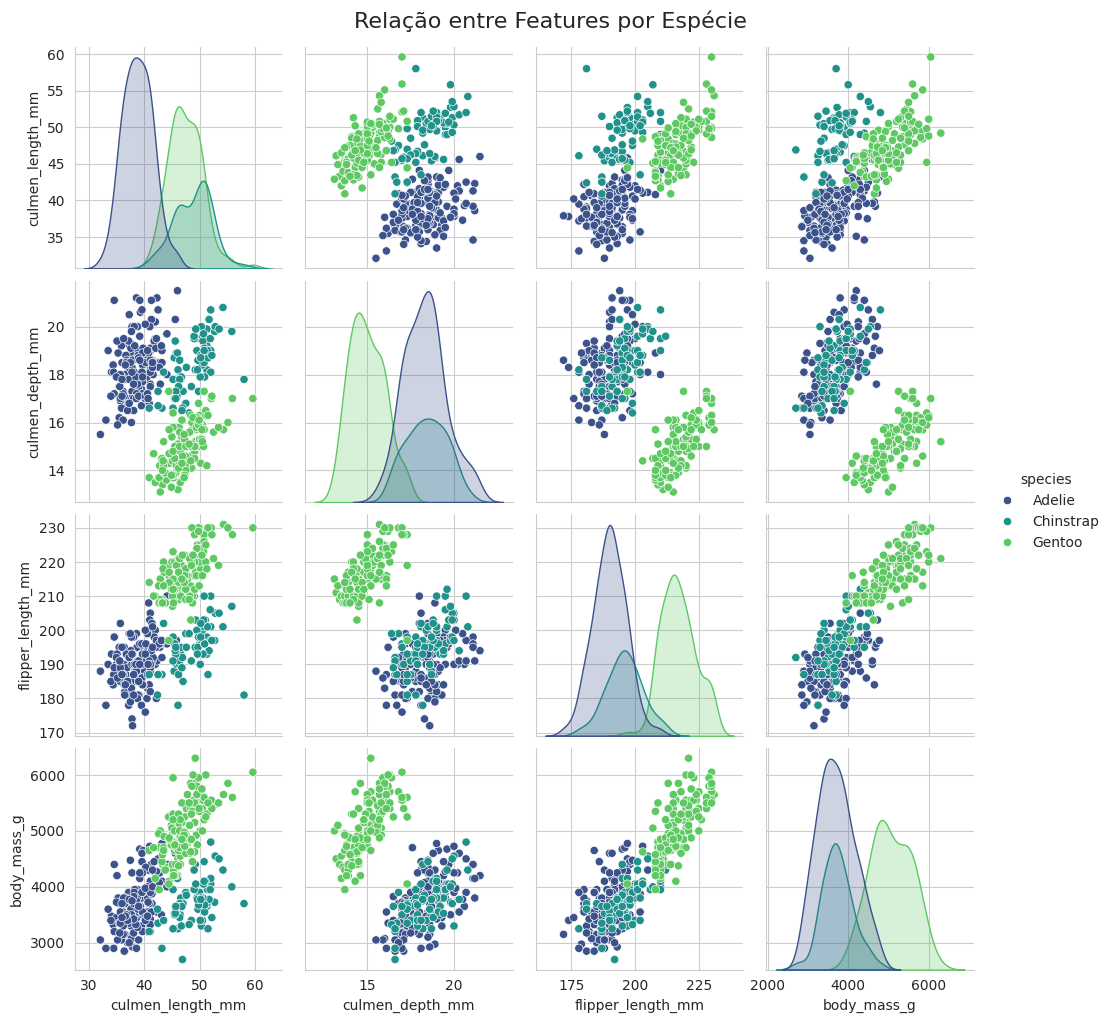

In [51]:
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle("Relação entre Features por Espécie", y=1.02, fontsize=16)
plt.show()

O pairplot mostra como as medidas corporais variam entre as espécies. Pinguins Gentoo aparecem consistentemente maiores em comprimento de bico, tamanho das nadadeiras e massa corporal. Adelie formam um grupo mais compacto, com valores menores e pouca variação. Chinstrap apresentam valores intermediários e, em alguns casos, sobreposição com outras espécies. As variáveis que mais diferenciam as espécies visualmente são flipper_length_mm, body_mass_g e culmen_length_mm.

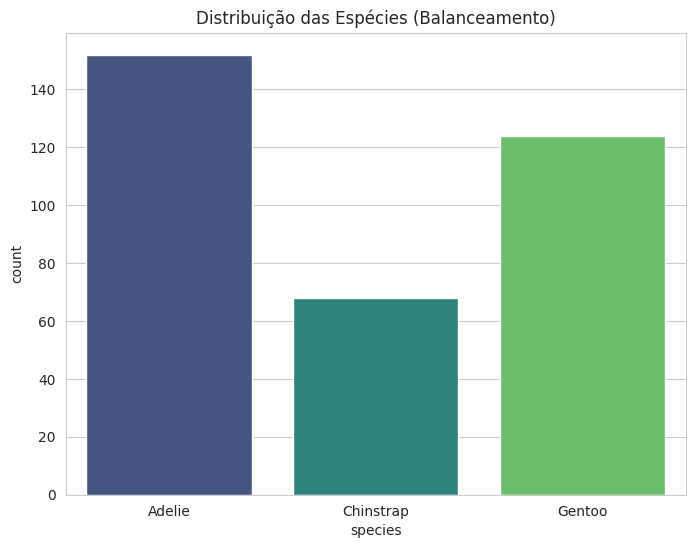

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='species', hue='species', data=df, palette='viridis')
plt.title('Distribuição das Espécies (Balanceamento)')
plt.show()

O gráfico de barras revela que a espécie Adelie é a mais numerosa no conjunto de dados, seguida pela Gentoo. A espécie Chinstrap possui a menor quantidade de registros. Apesar desse leve desbalanceamento, todas as classes têm volume suficiente para análises confiáveis e modelos de classificação.

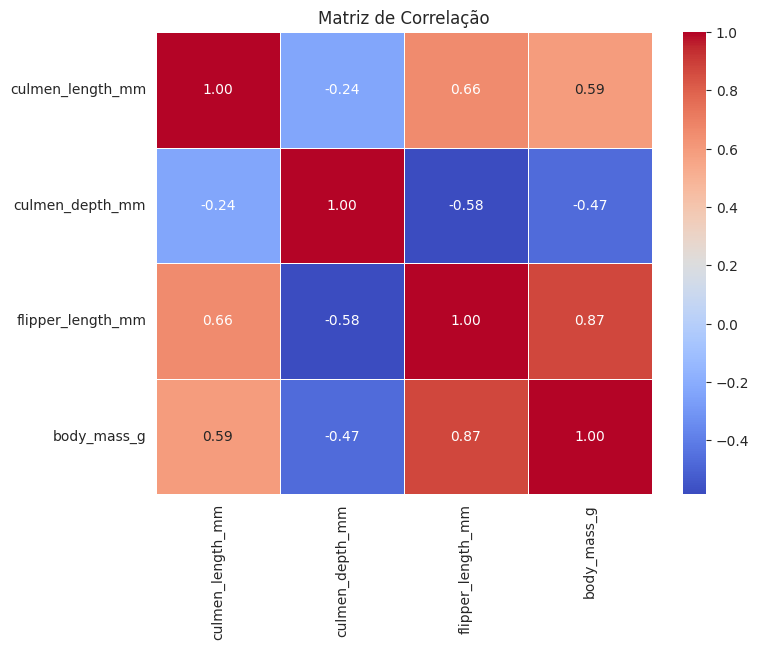

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

A matriz de correlação mostra que flipper_length_mm e body_mass_g possuem forte relação positiva, indicando que pinguins maiores também pesam mais. O comprimento do bico também se correlaciona moderadamente com a dimensão da barbatana. Já culmen_depth_mm apresenta correlações negativas com outras medidas, ajudando a distinguir espécies menores, como Adelie. Essas relações indicam quais variáveis são mais informativas para separação entre espécies.

## Aplicação das Técnicas de Aprendizado de Máquina

### Escolha dos Modelos: KNN e Random Forest

Na análise exploratória, observamos que a espécie Adelie forma grupos bem compactos, enquanto a Gentoo aparece mais isolada das demais. Esse comportamento espacial é ideal para o KNN, que funciona muito bem quando há separação visual entre os grupos.

O modelo Random Forest também é uma escolha apropriada, ao combinar várias árvores de decisão para produzir classificações mais robustas e estáveis. Percebemos que certas regras simples já separam bem as espécies, como a dimensão da nadadeira para identificar pinguins Gentoo.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [55]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pred_knn = knn_model.predict(X_test)

In [57]:
def print_results(model_name, y_test, y_pred):
  print(f"Resultados para o Modelo {model_name}:")
  print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
  print("\nRelatório de Classificação:")
  print(classification_report(y_test, y_pred))

In [58]:
print_results("KNN", y_test, y_pred_knn)

Resultados para o Modelo KNN:
Acurácia: 0.9855

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



In [59]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

def define_axes(X):
    offset = 0.5
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plot_predictions(clf, X, y):
    cmap_light = ListedColormap(["#FFCCCC", "#CCCCFF", "#CCFFCC"])
    cmap_dark  = ListedColormap(["#990000", "#000066", "#006600"])

    axes = define_axes(X)

    x0s = np.linspace(axes[0], axes[1], 300)
    x1s = np.linspace(axes[2], axes[3], 300)
    x0, x1 = np.meshgrid(x0s, x1s)

    X_mesh = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_mesh).reshape(x0.shape)

    plt.figure(figsize=(8, 6))

    plt.contourf(x0, x1, y_pred, alpha=0.35, cmap=cmap_light)

    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,
        palette=cmap_dark.colors,
        s=80,
        edgecolor="black"
    )

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Regiões de Decisão + Dados Reais")
    plt.legend(title="Classe")
    plt.show()

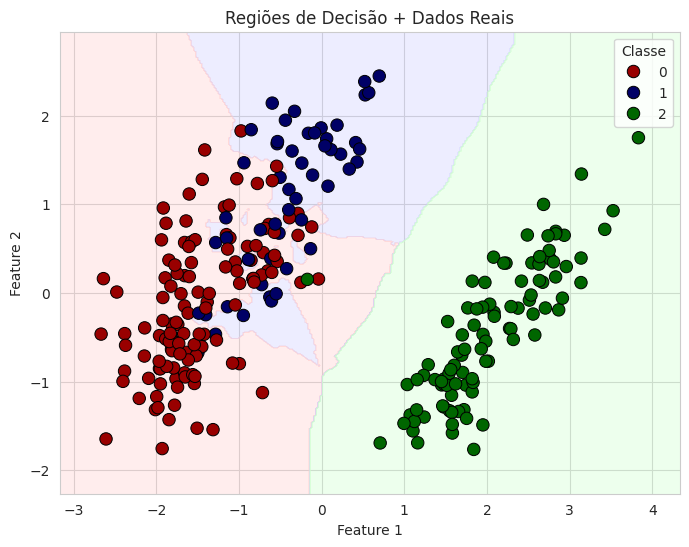

In [60]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

plot_predictions(knn_pca, X_train_pca, y_train)

A análise por classe mostra que o modelo classificou os pinguins Gentoo com desempenho perfeito, apresentando valores máximos de precisão, recall e f1-score. A espécie Adelie também apresentou desempenho excelente, com precisão total e um pequeno número de erros no recall. A espécie Chinstrap foi a classe mais desafiadora, apresentando leve queda na precisão, embora tenha atingido recall perfeito, indicando que todos os Chinstraps reais foram corretamente identificados.

In [61]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred_rf = rf_model.predict(X_test)

In [63]:
print_results("Random Forest", y_test, y_pred_rf)

Resultados para o Modelo Random Forest:
Acurácia: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



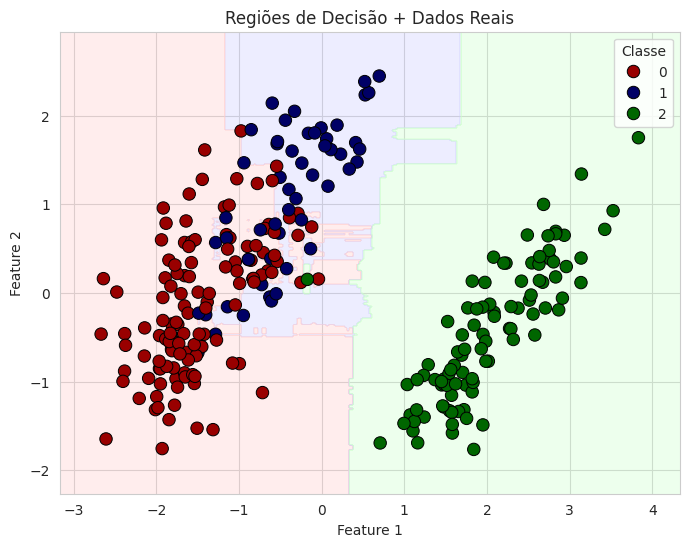

In [64]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train)

plot_predictions(rf_pca, X_train_pca, y_train)

In [69]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))

scores_knn = cross_val_score(knn_pipeline, X, y, cv=cv, scoring='accuracy')
scores_rf = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='accuracy')

In [73]:
print(f"Acurácias KNN: {scores_knn}")
print(f"Acurácias Random Forest: {scores_rf}")
print(f"Acurácia Média KNN: {scores_knn.mean():.4f}")
print(f"Acurácia Média Random Forest: {scores_rf.mean():.4f}")

Acurácias KNN: [1.         1.         1.         0.97101449 1.        ]
Acurácias Random Forest: [0.98550725 0.98550725 0.98550725 0.98550725 1.        ]
Acurácia Média KNN: 0.9942
Acurácia Média Random Forest: 0.9884
